
# Stackoverflow Survey 2019


When looking for jobs for data science, there is one thing you need. A portfolio of projects that show off your skills. This is hard for people trying to get there first job in data science, like me, because they dont have access to business data and its often hard to know what question they should try to answer. When you do get hold of a good data set, you often dont know what question to ask. In addition to this, the question's need to be relevant for a business, such as. 

- What is the ROI?
- How much time will this save?
- What opportunies will this unlock?
- etc...

So, why not make the search for a data science job, a data science project.

## Elements of a Data Science Project
- A Question that will add value to the business
- Collect the data
- Process the data and gain insight
- Communicate the insight
- Mske a decision.


### 1. Question
This is usually the hardest part of the project for someone new to come up with, which is why most new people find it hard to start a project. 

There are 2 question's relevant for any job seeker that add value to the person asking and can add insight into strategies for applying for your next role.

1. How much can i earn?
  - You want to know how much you should ask for when a prospective employer asks "What are your salary expectations?". You dont want to say too much, because this might indicate to the employer that you think too highly of yourself, or they cant afford you, so there is no point in asking you in for further interviews. You also dont want to as for too little, because this will indicate to the employer that you dont have the experience or you dont really understand what the role is.

2. How much competition will there be?
  - You might want to know how much competition there is, in order to define how much extra work you need to put into resumes in order to set your self apart from everyone else.

### Collect Data
Finding a relevant data set is typically the next hardest part of a data science project. Some data sets that might be usefull in our case, will be datasets from job search websites. These might have details about salary expectations for roles, but they wont have details of how many people are looking. The best data set for us is likely to be a survey of people in similar industries that are looking for work.

There just happens to be an organisation that sruveys its global membership on various aspects of their job roles and experience in similar industries, [Stackoverflow].

Each year, Stackoverflow conducts a developer survey designed to ask the developer community about everything from their favorite technologies to their job preferences. 2019 marks the ninth year they published the Annual Developer Survey results with 90,000 developers taking part. Obviously they conduct their own detailed analysis which can be found [here], but they also provide the [anonyimsed data] for the public to use.

So, now we have our data set.

### Process data and gain insight
This is where the budding data scientist can apply all those techniques they've learned. Depending on the data set and the goal of the project, there will be some Exploratory Data Analysis (EDA) of the data and some potential machine learning techniques making some predictions.

For us, we wont be making any predictions, we just need to understand what the expected salary of a data science role will be, and how many people will be looking for data science roles at the same time.

### Communicate the insight
This can be considered one of the most important aspects of the data science project, because in a business sence, if the decision makers aren't convinced about the outcome, the required decision wont be made.

The main information we wont to communicate is the salaries others are getting in the industry.

### Make a Decision
Once all the analysis has been conducted and communicated to 'management', they make the decision that will hopefully provide more money for the business. 

For us, the ultimate decision will give us a reasoanble estimate of our salary expectations. We will also have an idea of how much competiton we will be faceing. This will help inform us on our job searching strategies.



[Stackoverflow]:(https://stackoverflow.com/)
[here]:(https://insights.stackoverflow.com/survey/2019)
[anonyimsed data]:(https://insights.stackoverflow.com/survey)

---
We have a business question, and our data set. Now we need to conduct some Exploratory Data Analsys (EDA) to gain some insight from the data.

First We import all the libraries we will need, read the dataset in to a dataframe and have a quick look at the data that is available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from collections import defaultdict
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
survey = "Data\\2019_survey_results_public.csv"
surveyData = pd.read_csv(survey)
# convert the salary column to numbers
surveyData['CompTotal'] = pd.to_numeric(surveyData['CompTotal'],errors='coerce')
surveyData['DevType'].fillna('None',inplace=True)
surveyData.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


We can see that there are some features that have null values. This is where the budding data scientist will conduct some preliminary EDA and impute values for these missing data. We can ignore these, because none of the features we are concerned with have missing data.

Since the data set is a survey of the global community, we need to subset the data to the area that we are concerned with, Australia.

# Australia


## How are Australian's employed

In [6]:
Australia = surveyData[surveyData['Country'] == 'Australia'].reset_index()
total_Australians = Australia.shape[0]

print ('There were {} Australian respondents in the survey, which is {}% of the total population.'.
       format(total_Australians,round(total_Australians/surveyData.shape[0]*100,2)))


There were 1903 Australian respondents in the survey, which is 2.14% of the total population.


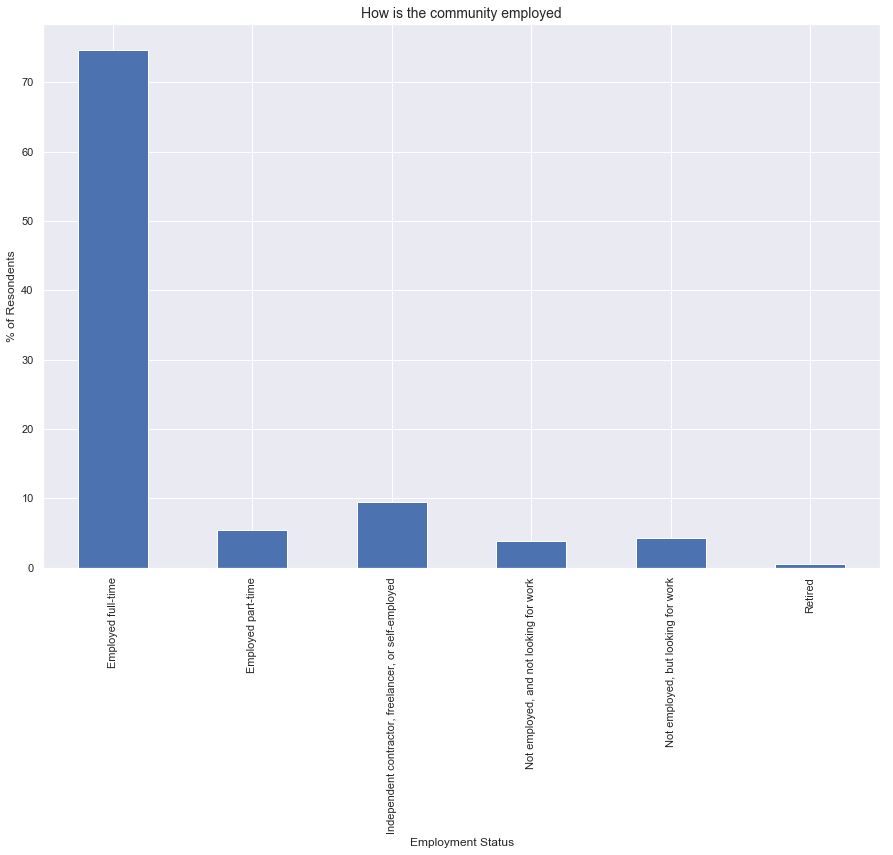

In [7]:

(Australia['Employment'].value_counts()/total_Australians*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Status')
plt.ylabel('% of Resondents')
plt.title('How is the Australian community employed', fontsize=14)
plt.show()

We can see that there is around 90% of the Australian population are employed in some sense.

In [8]:
Australia.drop(['index'],axis=1,inplace=True)



## What developer roles do Australians do?

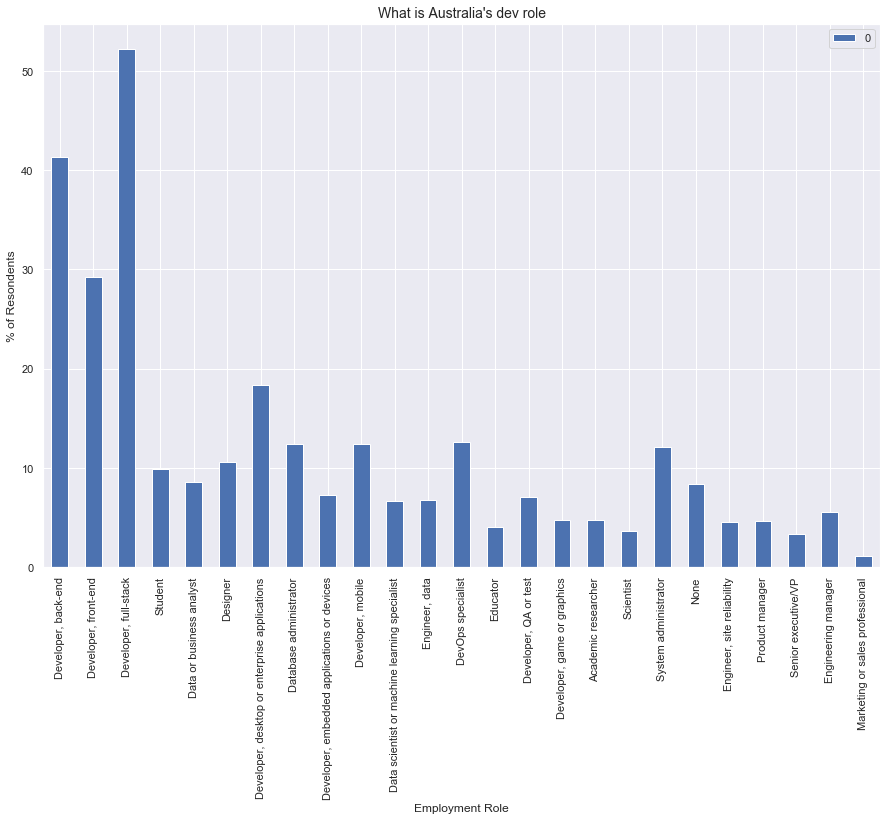

In [9]:
# Get list of lists of Type of Developers
devtype = [v.split(';') for v in Australia['DevType'].values]

# Convert all lists to a single list
devList = []

for d in devtype:
    for e in d:
        devList.append(e)

# Create a dictionary of number of listitem
b = {}
for item in devList:
    b[item] = b.get(item, 0) + 1

# Create a dataframe from dictionary
df_roles = pd.DataFrame(b, index=[0]).T

(df_roles/total_Australians*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Role')
plt.ylabel('% of Resondents')
plt.title("What is Australia's dev role", fontsize=14)
plt.show();

Since we are a budding data scientist looking for work, we are concerned with the Australian's that are in data roles, such as Data Analyst, or Data Scientist.

## How many Australian are employed in data roles?

In [10]:
Australia['CompFreq'][Australia['CompFreq'].isnull() == True] = 'Yearly'

Australia['yearlySalary'] = Australia['CompTotal']
Australia['yearlySalary'][Australia['CompFreq'] == 'Monthly'] = Australia['CompTotal']*12
Australia['yearlySalary'][Australia['CompFreq'] == 'Weekly'] = Australia['CompTotal']*52



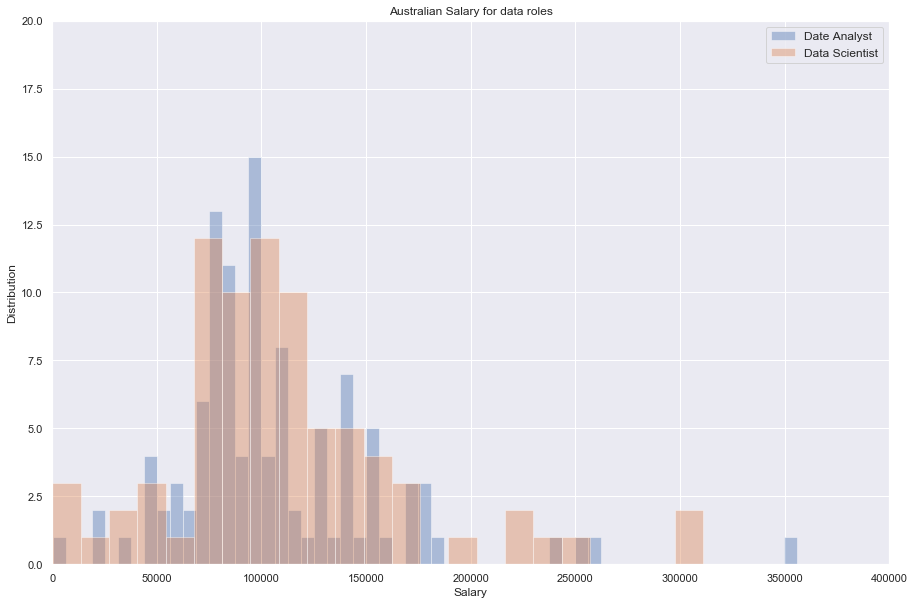

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = Australia['DevType'].str.contains("Data or business analyst")
Data_Analyst = Australia[mask]
sns.distplot(Data_Analyst['yearlySalary'], bins=1000, kde=False, label='Date Analyst')

mask = Australia['DevType'].str.contains("Data scientist or machine learning specialist")
Data_Scientist = Australia[mask]
sns.distplot(Data_Scientist['yearlySalary'], bins=1000, kde=False,label='Data Scientist')

plt.legend(prop={'size': 12})
plt.title('Australian Salary for data roles')
plt.xlabel('Salary')
plt.ylabel('Distribution')
plt.xlim(0,400000);
plt.ylim(0,20);
plt.show()

In [12]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, sem = np.mean(data), scipy.stats.sem(data)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, interval

In [13]:
# Ignore the obscene salaries greater than $300,000 and the ones less than $10,000 as
# these are liklely monthly salaries that werent labelled correctly or typos
Data_Analyst = Data_Analyst[(Data_Analyst['yearlySalary'] > 10000) & 
                            (Data_Analyst['yearlySalary'] < 400000)]
Data_Scientist = Data_Scientist[(Data_Scientist['yearlySalary'] > 10000) & 
                                (Data_Scientist['yearlySalary'] < 400000)]



DA_salary, DA_interval = mean_confidence_interval(Data_Analyst['yearlySalary'])
DS_salary, DS_interval = mean_confidence_interval(Data_Scientist['yearlySalary'])

print ("Average Data Analyst Salary: ${} ± ${}".format(round(DA_salary,2), round(DA_interval,2)))
print ("Average Data Scientist Salary: ${} ± ${}".format(round(DS_salary,2), round(DS_interval,2)))

Average Data Analyst Salary: $107644.97 ± $9189.8
Average Data Scientist Salary: $115734.8 ± $12616.18


We now have the answer to our first question. What is the answer to the employer asking 'What is your salary expectation?"

| Role | Salary Expecation |
| ---| --- |
| Data Analysit | \\$100,000 - \\$120,000 |
| Data Scientist | \\$110,000 - \\$130,000 |

We can now go onto our second question, "How much competition will there be?"

## How many people are looking for work?

In [82]:
employment = Australia.groupby(by='Employment')['Respondent'].count()/total_Australians*100


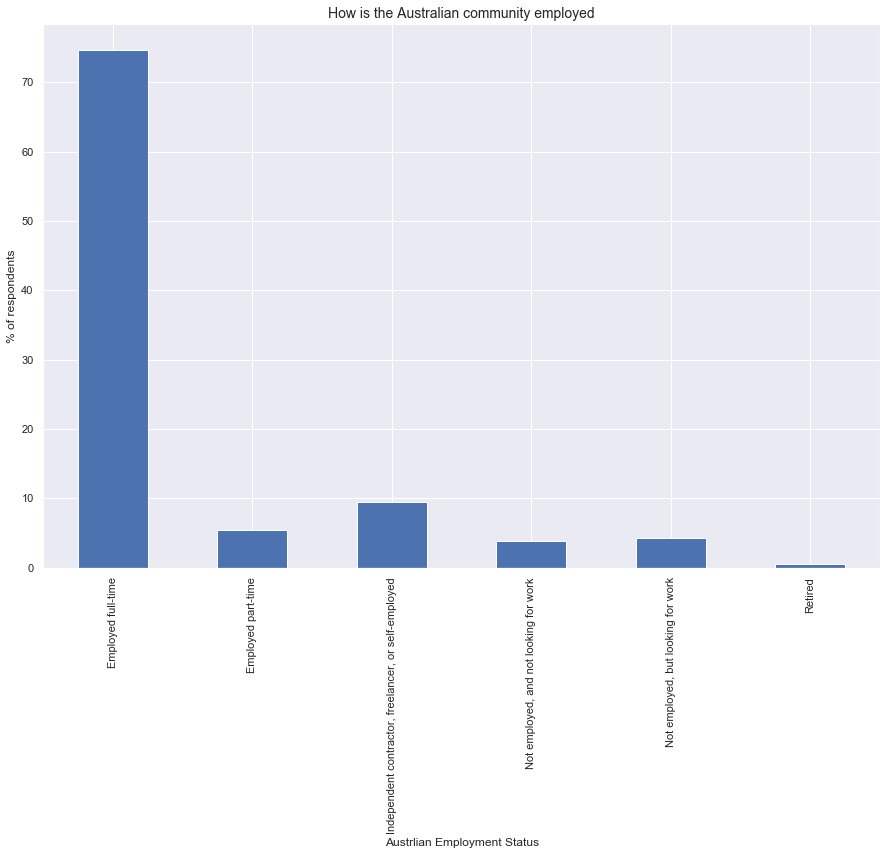

In [83]:
employment.plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Austrlian Employment Status')
plt.ylabel('% of respondents')
plt.title('How is the Australian community employed', fontsize=14)
plt.show()

In [84]:
round(employment,2)

Employment
Employed full-time                                      74.67
Employed part-time                                       5.47
Independent contractor, freelancer, or self-employed     9.51
Not employed, and not looking for work                   3.78
Not employed, but looking for work                       4.26
Retired                                                  0.53
Name: Respondent, dtype: float64

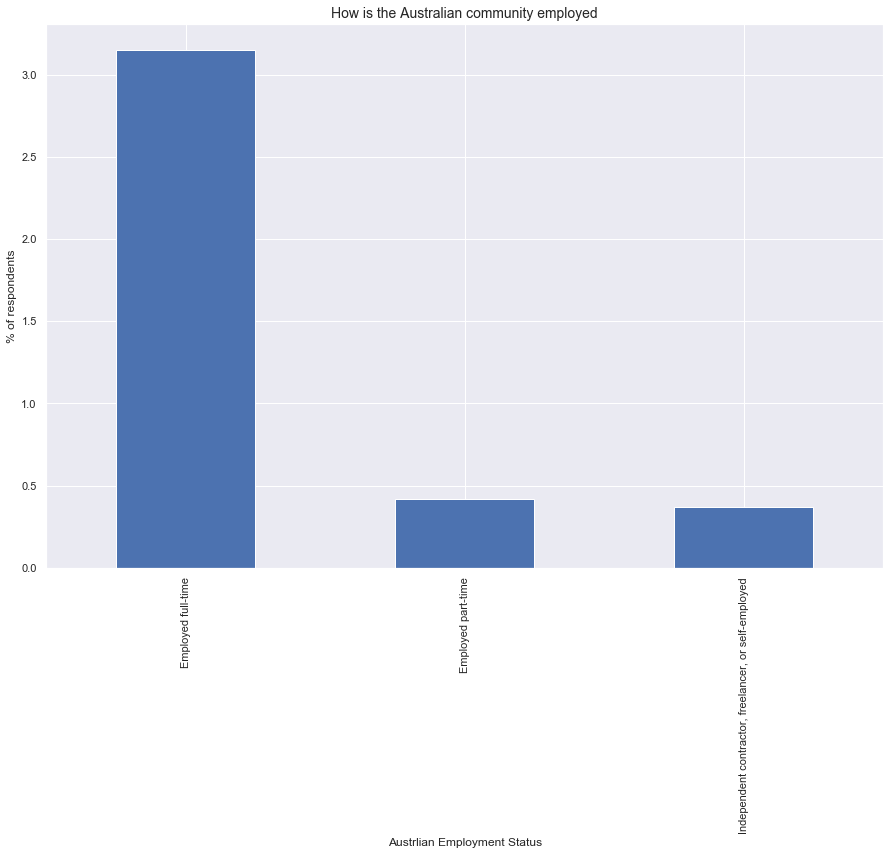

In [85]:
DSemployment = Data_Scientist.groupby(by='Employment')['Respondent'].count()/total_Australians*100
DSemployment.plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Austrlian Employment Status')
plt.ylabel('% of respondents')
plt.title('How is the Australian community employed', fontsize=14)
plt.show()

As of 2019 Stackover flow survey, only 4.2% of Austrlaian respondands where looking for work. There are no respondants currently working in data science that are not looking for any work. This might suggest that there is no competition, but we must realise that this is due to the [selection effect] of the survey.

We can assume the worst case and take the 4.2% as the portion of the population that is looking for work.

In order to determine how many of people we will be in competition with, we need to get some data relating to the population in each state and the employment market.


[Australian state populations] provides the population for each state and territory. Using the [LinkedIn search] capability will give us the total numner of data scientists currently working in each state. 

State | Population | Working data scientist |
--- | ---| --- |
New South Wales | 7,955,900 | 3388 |
Queensland | 4,827,000 | 3373 |
South Australia | 1,706,500 | 394 | 
Tasmania | 518,500 | 2229 |
Victoria | 6,430,000 | 1279 |
Western Australia |	2,613,700 | 1403 |

*as of 26 May, 2019*

[LinkedIn search]:(https://www.linkedin.com/search/results/people/?facetGeoRegion=%5B%22au%3A0%22%5D&keywords=data%20science&origin=FACETED_SEARCH)
[Australian state populations]:(https://en.wikipedia.org/wiki/States_and_territories_of_Australia)
[selection effect]:(https://en.wikipedia.org/wiki/Selection_bias)

In [86]:
population = pd.DataFrame({'New South Wales': [7955900], 'Queensland': [4827000], 'South Australia': [1706500],
                                  'Tasmania': [518500], 'Victoria': [6430000], 'Western Australia': [2613700]} )
columns = ['New South Wales', 'Queensland', 'South Australia', 
           'Tasmania', 'Victoria', 'Western Australia']
state_population = pd.DataFrame(data = population, columns=columns)

# linked in profiles containing data science 
aus_datascientist = 244788
NSW_DS = 87279

In [87]:
print ('Percentage of Australian data scientist: {0}%'.format(round(aus_datascientist/state_population.sum().sum()*100,3)))
print ('Percentage of NSW data scientist: {0}%'.format(round(NSW_DS/state_population['New South Wales'][0]*100,3)))
       

Percentage of Australian data scientist: 1.018%
Percentage of NSW data scientist: 1.097%


In [92]:
print ('Number of people in NSW looking for work as a data scientist is {0}'.format(round(NSW_DS*employment[4]/100,0)))


Number of people in NSW looking for work as a data scientist is 3715.0


We now have an maximum estimate of the number of people that we will be in competiton with, 3715. The budding data scientist should realise that this is the maximum number of people within the entire state of NSW, with admitadly, most being within the Sydney CBD. Also, this number contains people looking for roles at all levels, whic will not be relavant for people trying to get into the industry.